In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import json

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.style.use('default')

# For reproducibility
np.random.seed(42)

In [2]:
# Read the dataset
df = pd.read_csv('job_descriptions.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nFirst few rows:")
print("-" * 50)
display(df.head())

print("\nCheck for missing values:")
print("-" * 50)
print(df.isnull().sum())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-nul

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."



Check for missing values:
--------------------------------------------------
Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
                    ... 
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
Length: 23, dtype: int64


In [3]:
# Process salary ranges
def extract_salary_range(salary_str):
    # Remove '$' and 'K', then split on '-'
    try:
        values = salary_str.replace('$', '').replace('K', '').split('-')
        return pd.Series([float(values[0]), float(values[1])], index=['min_salary', 'max_salary'])
    except:
        # If there's any error in processing, return NaN
        return pd.Series([np.nan, np.nan], index=['min_salary', 'max_salary'])

# Create new columns for min and max salary
salary_df = df['Salary Range'].apply(extract_salary_range)
df = pd.concat([df, salary_df], axis=1)

In [4]:
# Calculate average salary for each position
df['avg_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

Text(0.5, 0, 'Salary (K$)')

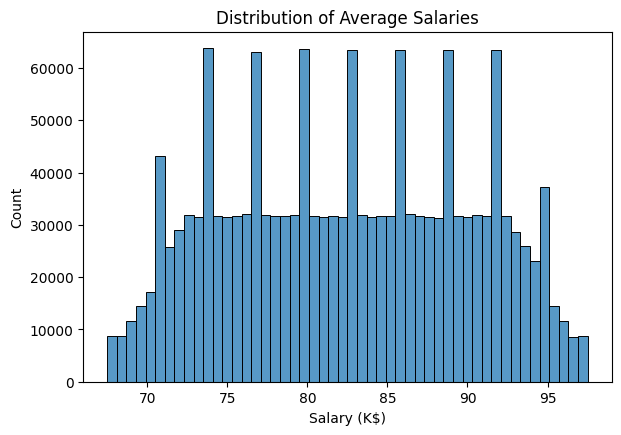

In [5]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Salary distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='avg_salary', bins=50)
plt.title('Distribution of Average Salaries')
plt.xlabel('Salary (K$)')

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\0sann\AppData\Local\Temp\ipykernel_9348\4273299694.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['min_experience'] = df['Experience'].str.extract('(\d+)').astype(float)


Text(0, 0.5, 'Average Salary (K$)')

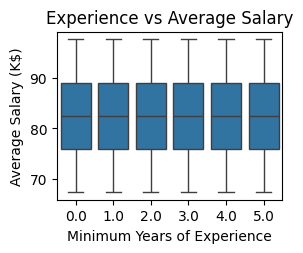

In [6]:
# Experience vs Salary
plt.subplot(2, 2, 2)
# Extract minimum years of experience
df['min_experience'] = df['Experience'].str.extract('(\d+)').astype(float)
sns.boxplot(data=df, x='min_experience', y='avg_salary')
plt.title('Experience vs Average Salary')
plt.xlabel('Minimum Years of Experience')
plt.ylabel('Average Salary (K$)')

Text(0, 0.5, 'Average Salary (K$)')

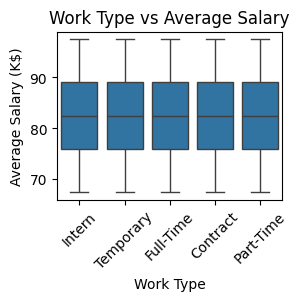

In [7]:
# Work Type vs Salary
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Work Type', y='avg_salary')
plt.xticks(rotation=45)
plt.title('Work Type vs Average Salary')
plt.xlabel('Work Type')
plt.ylabel('Average Salary (K$)')

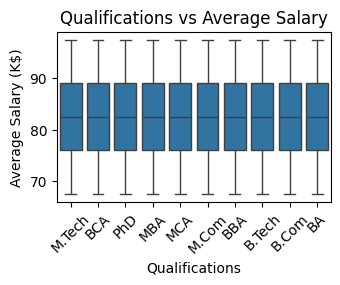

In [8]:
# Qualifications vs Salary
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Qualifications', y='avg_salary')
plt.xticks(rotation=45)
plt.title('Qualifications vs Average Salary')
plt.xlabel('Qualifications')
plt.ylabel('Average Salary (K$)')

plt.tight_layout()
plt.show()

In [9]:
# Print summary statistics
print("\nSalary Statistics (in thousands $):")
print(df[['min_salary', 'max_salary', 'avg_salary']].describe())

print("\nTop 10 highest paying roles:")
print(df.groupby('Role')['avg_salary'].mean().sort_values(ascending=False).head(10))


Salary Statistics (in thousands $):
         min_salary    max_salary    avg_salary
count  1.615940e+06  1.615940e+06  1.615940e+06
mean   6.000343e+01  1.049789e+02  8.249115e+01
std    3.163964e+00  1.471749e+01  7.528413e+00
min    5.500000e+01  8.000000e+01  6.750000e+01
25%    5.700000e+01  9.200000e+01  7.600000e+01
50%    6.000000e+01  1.050000e+02  8.250000e+01
75%    6.300000e+01  1.180000e+02  8.900000e+01
max    6.500000e+01  1.300000e+02  9.750000e+01

Top 10 highest paying roles:
Role
Treasury Manager                 82.900548
HVAC Engineer                    82.839642
Visual Designer                  82.788167
Geriatric Physical Therapist     82.772936
Accounting Controller            82.766917
Litigation Support Specialist    82.742394
System Administrator             82.714614
Solution Architect               82.708671
Corporate Paralegal              82.705595
Technical SEO Specialist         82.703563
Name: avg_salary, dtype: float64


In [10]:
# Process experience and create visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [11]:
# Experience requirements analysis
def get_experience_range(exp_str):
    numbers = [int(x) for x in exp_str.split() if x.isdigit()]
    return numbers[1] - numbers[0]

df['experience_range'] = df['Experience'].apply(get_experience_range)

Text(0.5, 0, 'Years of Experience Range')

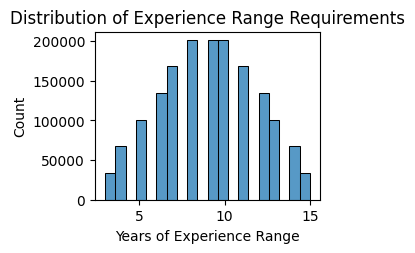

In [12]:
# Plot 1: Experience Range Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='experience_range', bins=20)
plt.title('Distribution of Experience Range Requirements')
plt.xlabel('Years of Experience Range')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Very Small'),
  Text(1, 0, 'Small'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'Large'),
  Text(4, 0, 'Very Large')])

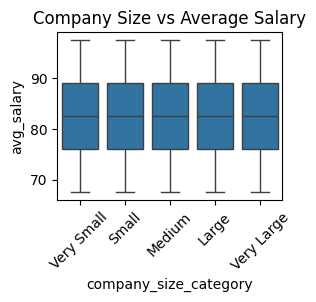

In [13]:
# Plot 2: Company Size vs Salary
plt.subplot(2, 2, 2)
df['company_size_category'] = pd.qcut(df['Company Size'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
sns.boxplot(data=df, x='company_size_category', y='avg_salary')
plt.title('Company Size vs Average Salary')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Stack Overflow Jobs'),
  Text(1, 0, 'FlexJobs'),
  Text(2, 0, 'LinkedIn'),
  Text(3, 0, 'Indeed'),
  Text(4, 0, 'Jobs2Careers'),
  Text(5, 0, 'CareerBuilder'),
  Text(6, 0, 'Monster'),
  Text(7, 0, 'Dice'),
  Text(8, 0, 'ZipRecruiter'),
  Text(9, 0, 'USAJOBS'),
  Text(10, 0, 'The Muse'),
  Text(11, 0, 'Idealist'),
  Text(12, 0, 'Internships.com'),
  Text(13, 0, 'Snagajob'),
  Text(14, 0, 'SimplyHired'),
  Text(15, 0, 'Glassdoor')])

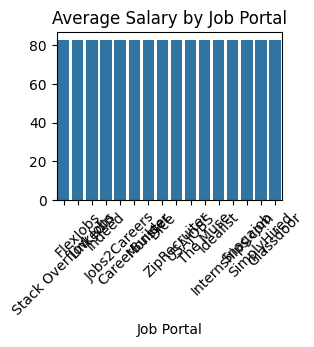

In [14]:
# Plot 3: Job Portal Analysis
plt.subplot(2, 2, 3)
portal_salary = df.groupby('Job Portal')['avg_salary'].mean().sort_values(ascending=False)
sns.barplot(x=portal_salary.index, y=portal_salary.values)
plt.title('Average Salary by Job Portal')
plt.xticks(rotation=45)

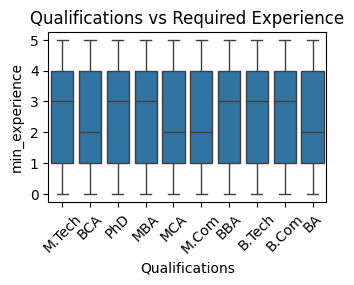

In [15]:
# Plot 4: Qualifications vs Experience Requirement
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Qualifications', y='min_experience')
plt.title('Qualifications vs Required Experience')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Print some additional insights
print("\nExperience Requirements Summary:")
print(df['experience_range'].describe())

print("\nMost Common Qualifications:")
print(df['Qualifications'].value_counts().head())

print("\nMost Common Work Types:")
print(df['Work Type'].value_counts())


Experience Requirements Summary:
count    1.615940e+06
mean     8.996174e+00
std      2.859574e+00
min      3.000000e+00
25%      7.000000e+00
50%      9.000000e+00
75%      1.100000e+01
max      1.500000e+01
Name: experience_range, dtype: float64

Most Common Qualifications:
Qualifications
BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
Name: count, dtype: int64

Most Common Work Types:
Work Type
Part-Time    324044
Temporary    323439
Contract     323131
Intern       323090
Full-Time    322236
Name: count, dtype: int64


Summary of Engineered Features:
--------------------------------------------------

Skills Count Statistics:
count    1.615940e+06
mean     1.665803e+00
std      1.317682e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.000000e+01
Name: skills_count, dtype: float64

Benefits Count Statistics:
count    1615940.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: benefits_count, dtype: float64

Description Length Statistics:
count    1.615940e+06
mean     1.853684e+02
std      5.174361e+01
min      8.100000e+01
25%      1.560000e+02
50%      1.780000e+02
75%      2.130000e+02
max      4.300000e+02
Name: description_length, dtype: float64


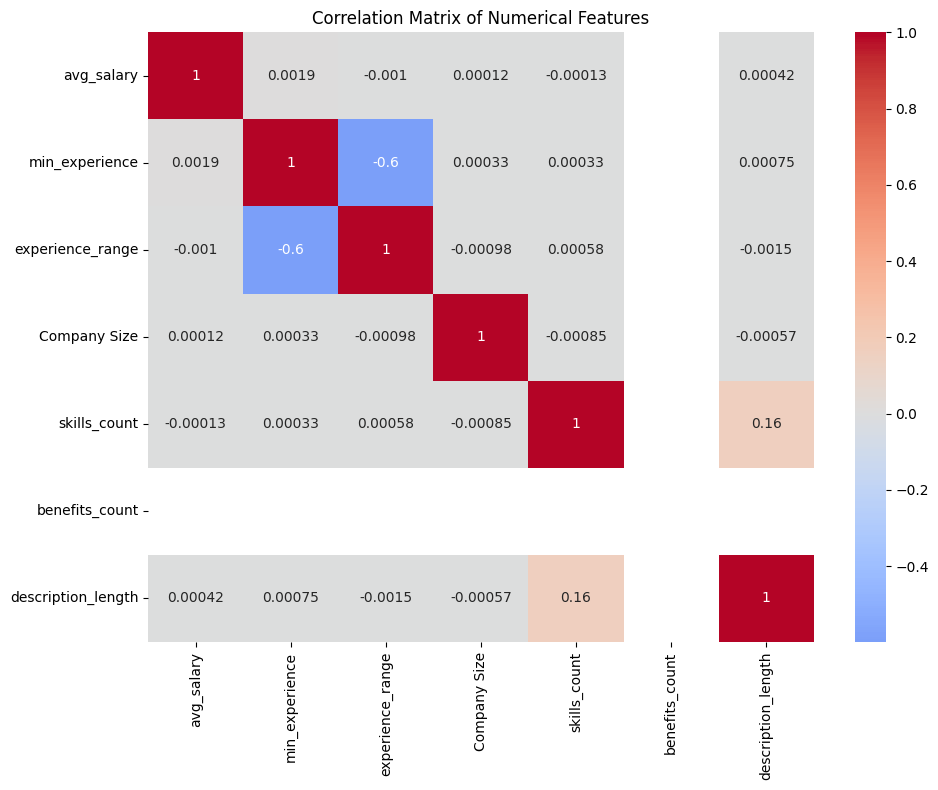

In [17]:
# Process text features and create engineered features
from sklearn.feature_extraction.text import TfidfVectorizer
from ast import literal_eval

# Function to extract key skills
def extract_skills(skills_str):
    try:
        # Split the skills string and get unique skills
        skills_list = [skill.strip() for skill in skills_str.split(',')]
        return len(skills_list)
    except:
        return 0

# Function to process benefits
def process_benefits(benefits_str):
    try:
        # Convert string representation of set to actual set and count benefits
        benefits_set = literal_eval(benefits_str)
        return len(benefits_set)
    except:
        return 0

# Create new features
df['skills_count'] = df['skills'].apply(extract_skills)
df['benefits_count'] = df['Benefits'].apply(process_benefits)
df['description_length'] = df['Job Description'].str.len()

# Print summary of new features
print("Summary of Engineered Features:")
print("-" * 50)
print("\nSkills Count Statistics:")
print(df['skills_count'].describe())

print("\nBenefits Count Statistics:")
print(df['benefits_count'].describe())

print("\nDescription Length Statistics:")
print(df['description_length'].describe())

# Create correlation matrix for numerical features
numerical_features = ['avg_salary', 'min_experience', 'experience_range', 
                     'Company Size', 'skills_count', 'benefits_count', 
                     'description_length']

correlation_matrix = df[numerical_features].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

Training the model...

Making predictions...

Model Performance Metrics:
--------------------------------------------------
Mean Absolute Error: $6.47K
Root Mean Squared Error: $7.53K
R² Score: -0.0001


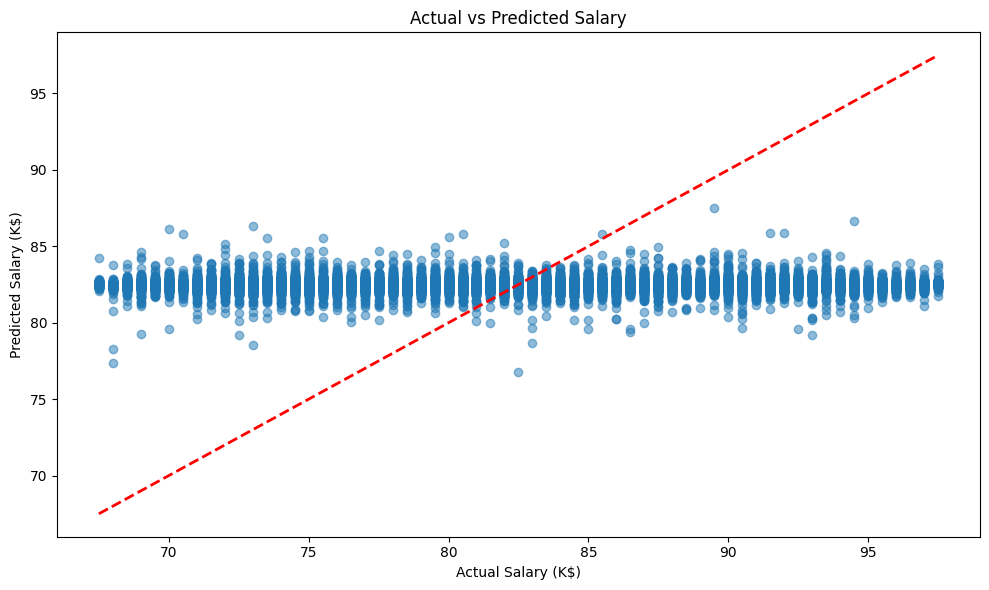

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# First, let's prepare our features and target
# Select features for our model
features = ['Experience', 'Qualifications', 'Work Type', 'Company Size', 
           'skills_count', 'benefits_count', 'description_length', 
           'experience_range']
# Target variable is avg_salary
X = df[features]
y = df['avg_salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_features = ['Company Size', 'skills_count', 'benefits_count', 
                   'description_length', 'experience_range']
categorical_features = ['Experience', 'Qualifications', 'Work Type']

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Updated this line

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

# Fit the pipeline
print("Training the model...")
model.fit(X_train, y_train)

# Make predictions
print("\nMaking predictions...")
y_pred = model.predict(X_test)

# Print metrics
print("\nModel Performance Metrics:")
print("-" * 50)
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.2f}K")
print(f"Root Mean Squared Error: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}K")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Create visualization of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary (K$)')
plt.ylabel('Predicted Salary (K$)')
plt.title('Actual vs Predicted Salary')
plt.tight_layout()
plt.show()

Data Analysis:
--------------------------------------------------

Target Variable (Salary) Statistics:
count    1.615940e+06
mean     8.249115e+01
std      7.528413e+00
min      6.750000e+01
25%      7.600000e+01
50%      8.250000e+01
75%      8.900000e+01
max      9.750000e+01
Name: avg_salary, dtype: float64


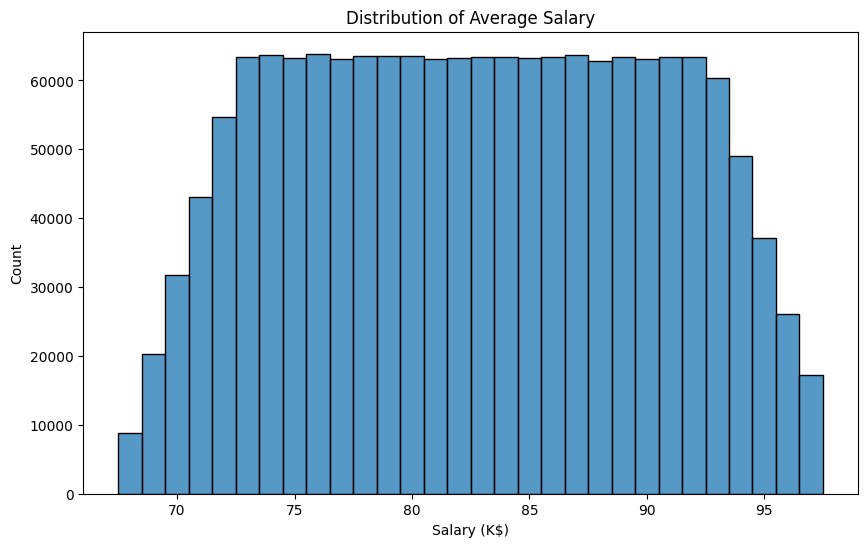

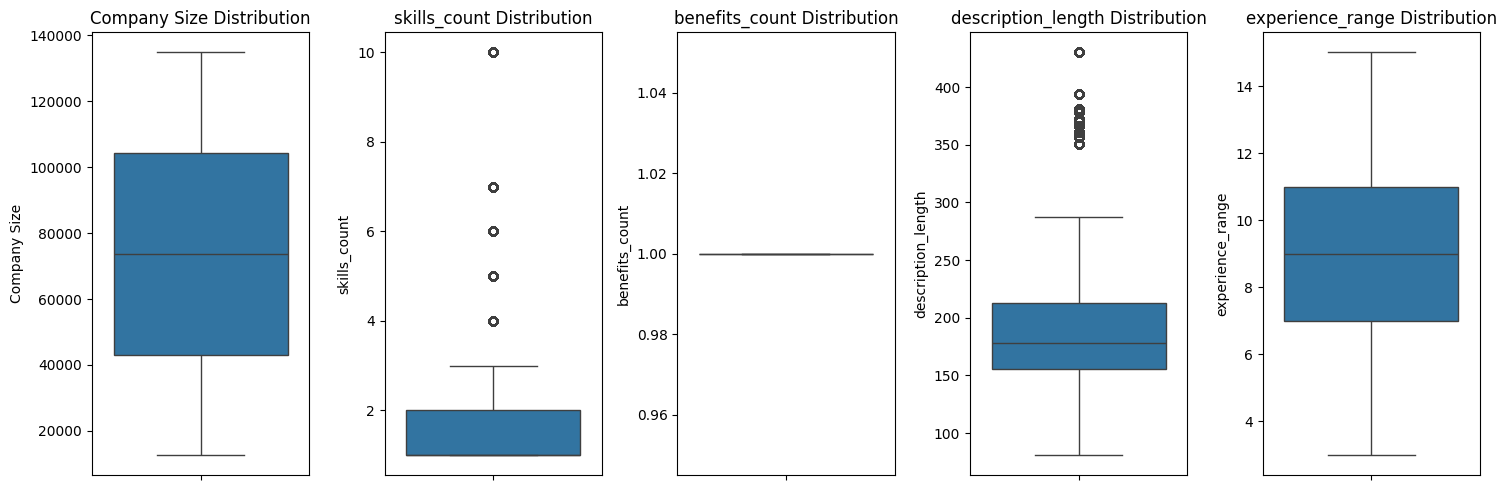

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. First, let's analyze the data
print("Data Analysis:")
print("-" * 50)
print("\nTarget Variable (Salary) Statistics:")
print(df['avg_salary'].describe())

# Visualize salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary'], bins=30)
plt.title('Distribution of Average Salary')
plt.xlabel('Salary (K$)')
plt.show()

# Check for outliers in numeric features
numeric_features = ['Company Size', 'skills_count', 'benefits_count', 
                   'description_length', 'experience_range']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [20]:
# 2. Feature Engineering
# Create interaction terms
df['skills_benefits_interaction'] = df['skills_count'] * df['benefits_count']
df['size_experience_interaction'] = df['Company Size'] * df['experience_range']

# Update features list
features = ['Experience', 'Qualifications', 'Work Type', 'Company Size', 
           'skills_count', 'benefits_count', 'description_length', 
           'experience_range', 'skills_benefits_interaction', 
           'size_experience_interaction']

X = df[features]
y = df['avg_salary']

In [21]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# 4. Create improved preprocessing steps
numeric_features = ['Company Size', 'skills_count', 'benefits_count', 
                   'description_length', 'experience_range',
                   'skills_benefits_interaction', 'size_experience_interaction']
categorical_features = ['Experience', 'Qualifications', 'Work Type']

# Use RobustScaler instead of StandardScaler to handle outliers better
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# 5. Try different models
models = {
    'RandomForest': RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=3,
        random_state=42
    )
}

In [ ]:
# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, 
                              cv=5, scoring='r2')
    print(f"Cross-validation R² scores: {cv_scores}")
    print(f"Average CV R² score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Fit on full training data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Print metrics
    print(f"\n{name} Performance Metrics:")
    print("-" * 50)
    print(f"Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.2f}K")
    print(f"Root Mean Squared Error: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}K")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    
    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Salary (K$)')
    plt.ylabel('Predicted Salary (K$)')
    plt.title(f'Actual vs Predicted Salary ({name})')
    plt.tight_layout()
    plt.show()


Training RandomForest...


In [ ]:
# Feature importance for the best model (using Random Forest as it provides feature importance)
if 'RandomForest' in models:
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', models['RandomForest'])
    ])
    rf_pipeline.fit(X_train, y_train)
    
    # Get feature names after preprocessing
    feature_names = (numeric_features + 
                    [f"{feat}_{val}" for feat, vals in 
                     zip(categorical_features, 
                         categorical_transformer.fit(X_train[categorical_features]).categories_)
                     for val in vals[1:]])
    
    # Plot feature importance
    importances = rf_pipeline.named_steps['regressor'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()